# DECISION TREE REGRESSOR ALGORITHEM

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [3]:
df=pd.read_csv('Accenture.csv',usecols=["Open","High","Low","Volume","Close"])

df.head()

,Open,High,Low,Close,Volume
0,11.234038,11.375393,11.159640,11.286116,34994300
1,11.196839,11.196839,11.010845,11.167080,9238500
2,11.159637,11.167077,10.824848,11.159637,7501000
3,11.122439,11.137319,10.936445,11.055481,3537300
4,10.936445,11.122439,10.899246,11.122439,4208100


In [4]:
df=df.dropna()

In [5]:
df.columns

Index(['Open', 'High', 'Low', 'Close', 'Volume'], dtype='object')

In [6]:
df.tail()

,Open,High,Low,Close,Volume
5077,337.619995,344.739990,337.130005,343.000000,4543400
5078,340.679993,342.880005,337.720001,339.230011,2035900
5079,337.519989,337.720001,333.079987,334.510010,2025300
5080,331.559998,332.019989,323.859985,324.209991,2300500
5081,326.299988,326.410004,323.070007,323.529999,1741300


In [7]:
x = df.drop(labels='Close', axis=1)
y = df.loc[:,'Close']

In [8]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state=42)
print("NUMBER OF TRAIN DATASET    : ", len(x_train))
print("NUMBER OF TEST DATASET      : ", len(x_test))
print("TOTAL NUMBER OF DATASET    : ", len(x_train)+len(x_test))

NUMBER OF TRAIN DATASET    :  4065
NUMBER OF TEST DATASET      :  1017
TOTAL NUMBER OF DATASET    :  5082


In [9]:
print("NUMBER OF TRAIN DATASET    : ", len(y_train))
print("NUMBER OF TEST DATASET      : ", len(y_test))
print("TOTAL NUMBER OF DATASET    : ", len(y_train)+len(y_test))

NUMBER OF TRAIN DATASET    :  4065
NUMBER OF TEST DATASET      :  1017
TOTAL NUMBER OF DATASET    :  5082


In [10]:
from sklearn.tree import DecisionTreeRegressor

In [11]:
DTR = DecisionTreeRegressor()
DTR.fit(x_train,y_train)

DecisionTreeRegressor()

In [12]:
predicted = DTR.predict(x_test)

In [13]:
from sklearn.metrics import rand_score
RS = rand_score(y_test, predicted)
print("MEAN RAND SCOORE OF DECISION TREE REGRESSOR",RS*100)

MEAN RAND SCOORE OF DECISION TREE REGRESSOR 99.94309339651127


In [14]:
from sklearn.metrics import r2_score
R2 = r2_score(y_test, predicted)
print("MEAN R2 SCOORE OF DECISION TREE REGRESSOR",R2*100)

MEAN R2 SCOORE OF DECISION TREE REGRESSOR 99.98050620120611


In [15]:
from sklearn.metrics import mean_squared_error
MSE = mean_squared_error(y_test, predicted)
print("MEAN SQUARE ERROR OF DECISION TREE REGRESSOR",MSE)

MEAN SQUARE ERROR OF DECISION TREE REGRESSOR 1.0409653499341944


In [16]:
from sklearn.metrics import mean_squared_error
RMSE = mean_squared_error(y_test, predicted, squared=False)
print(" ROOT MEAN SQUARE ERROR OF DECISION TREE REGRESSOR",RMSE)

 ROOT MEAN SQUARE ERROR OF DECISION TREE REGRESSOR 1.0202770946827113


In [17]:
from sklearn.metrics import mean_absolute_error
MAE = mean_absolute_error(y_test, predicted)
print("MEAN ABSOLUTE ERROR OF DECISION TREE REGRESSOR",MAE)

MEAN ABSOLUTE ERROR OF DECISION TREE REGRESSOR 0.5127316768424937


In [18]:
from sklearn.metrics import explained_variance_score
EVS = explained_variance_score(y_test, predicted)
print("EXPLAINED VARIANCE SCORE OF DECISION TREE REGRESSOR",EVS)

EXPLAINED VARIANCE SCORE OF DECISION TREE REGRESSOR 0.9998055036072546


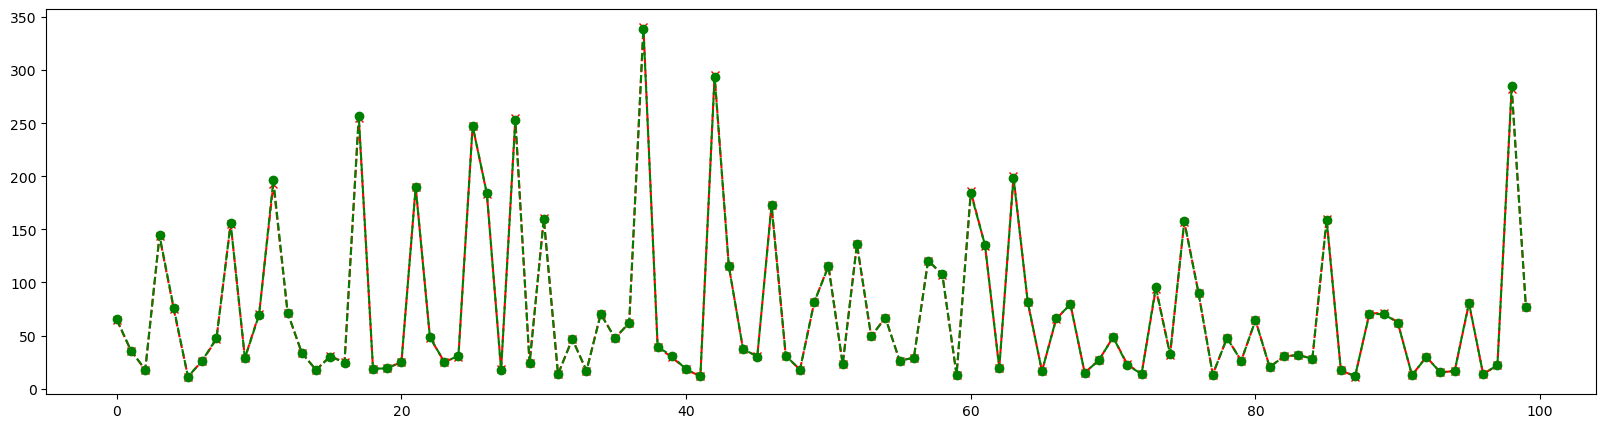

In [19]:
import matplotlib.pyplot as plt
df2 = pd.DataFrame()
df2["y_test"] = y_test
df2["predicted"] = predicted
df2.reset_index(inplace=True)
plt.figure(figsize=(20, 5))
plt.plot(df2["predicted"][:100], marker='x', linestyle='dashed', color='red')
plt.plot(df2["y_test"][:100],  marker='o', linestyle='dashed', color='green')
plt.show()

In [20]:
import joblib
joblib.dump(DTR, 'Accenture.pkl')

['Accenture.pkl']

In [21]:
# import ydata_profiling as yp
# import pandas_profiling
# from pandas_profiling import ProfileReport
# from ydata_profiling.model import describe
# prof = ProfileReport(df)
# prof.to_file(output_file='Accenture.html')

# conda install -c conda-forge pandas-profiling=2.6.0
# pip install pandas-profiling
#pip install ydata-profiling
#pip install ydata_profiling matplotlib